### Imports

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

#### Reading in the data

In [ ]:
path = '/content/drive/MyDrive/bitcoin.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
4415,2022-08-19,23201.6,23202.3,20807.8,20831.3,339472,USD
4416,2022-08-20,20830.7,21357.4,20784.8,21138.9,206943,USD
4417,2022-08-21,21138.9,21692.4,21077.4,21517.2,177522,USD
4418,2022-08-22,21516.8,21517.4,20912.1,21416.3,251833,USD
4419,2022-08-23,21416.5,21458.2,21271.2,21309.0,251695,USD


#### Data Preprocessing

In [ ]:
df.isnull().any()

Date        False
Open        False
High        False
Low         False
Close       False
Volume      False
Currency    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4420 non-null   object 
 1   Open      4420 non-null   float64
 2   High      4420 non-null   float64
 3   Low       4420 non-null   float64
 4   Close     4420 non-null   float64
 5   Volume    4420 non-null   int64  
 6   Currency  4420 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 241.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,4420.000000,4420.000000,4420.000000,4420.000000,4.420000e+03
mean,8302.221855,8531.971380,8043.473869,8306.969457,1.395788e+07
std,14598.398937,14992.605971,14146.499234,14599.046649,1.645973e+08
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,122.500000,129.975000,118.300000,122.800000,3.013600e+04
50%,683.600000,706.500000,657.550000,685.000000,6.762050e+04
75%,8877.250000,9122.700000,8666.900000,8886.075000,1.769402e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


In [ ]:
# convert 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date']

0      2010-07-18
1      2010-07-19
2      2010-07-20
3      2010-07-21
4      2010-07-22
          ...    
4415   2022-08-19
4416   2022-08-20
4417   2022-08-21
4418   2022-08-22
4419   2022-08-23
Name: Date, Length: 4420, dtype: datetime64[ns]

###  Feature Engineering

In [ ]:
df['Close'] = df['Close'].shift(-1)

In [ ]:
df = df.drop(df.index[-1])

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Currency
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD
...,...,...,...,...,...,...,...
4415,2022-08-19,23201.6,23202.3,20807.8,21138.9,339472,USD
4416,2022-08-20,20830.7,21357.4,20784.8,21517.2,206943,USD
4417,2022-08-21,21138.9,21692.4,21077.4,21416.3,177522,USD
4418,2022-08-22,21516.8,21517.4,20912.1,21309.0,251833,USD


In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Volume
Open,1.000000,0.999589,0.999221,0.998058,0.182761
High,0.999589,1.000000,0.999158,0.998586,0.182589
Low,0.999221,0.999158,1.000000,0.998436,0.183437
Close,0.998058,0.998586,0.998436,1.000000,0.181962
Volume,0.182761,0.182589,0.183437,0.181962,1.000000


In [ ]:
# create new features
# extract year and month and other time values from our time column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Currency,Difference,Year,Month,Day
0,2010-07-18,0.0,0.1,0.1,0.1,75,USD,0.0,2010,7,18
1,2010-07-19,0.1,0.1,0.1,0.1,574,USD,0.0,2010,7,19
2,2010-07-20,0.1,0.1,0.1,0.1,262,USD,0.0,2010,7,20
3,2010-07-21,0.1,0.1,0.1,0.1,575,USD,0.0,2010,7,21
4,2010-07-22,0.1,0.1,0.1,0.1,2160,USD,0.0,2010,7,22
5,2010-07-23,0.1,0.1,0.1,0.1,2403,USD,0.0,2010,7,23
6,2010-07-24,0.1,0.1,0.1,0.1,496,USD,0.0,2010,7,24
7,2010-07-25,0.1,0.1,0.1,0.1,1551,USD,0.0,2010,7,25
8,2010-07-26,0.1,0.1,0.1,0.1,877,USD,0.0,2010,7,26
9,2010-07-27,0.1,0.1,0.1,0.1,3374,USD,0.0,2010,7,27


In [ ]:
# 'Currency' column is dropped because it does not add any information to the dataset.

df= df.drop('Currency', axis=1)


In [ ]:
df

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2010-07-18,0.0,0.1,0.1,0.1,75,2010,7,18
1,2010-07-19,0.1,0.1,0.1,0.1,574,2010,7,19
2,2010-07-20,0.1,0.1,0.1,0.1,262,2010,7,20
3,2010-07-21,0.1,0.1,0.1,0.1,575,2010,7,21
4,2010-07-22,0.1,0.1,0.1,0.1,2160,2010,7,22
...,...,...,...,...,...,...,...,...,...
4415,2022-08-19,23201.6,23202.3,20807.8,21138.9,339472,2022,8,19
4416,2022-08-20,20830.7,21357.4,20784.8,21517.2,206943,2022,8,20
4417,2022-08-21,21138.9,21692.4,21077.4,21416.3,177522,2022,8,21
4418,2022-08-22,21516.8,21517.4,20912.1,21309.0,251833,2022,8,22


###  Data Visualization

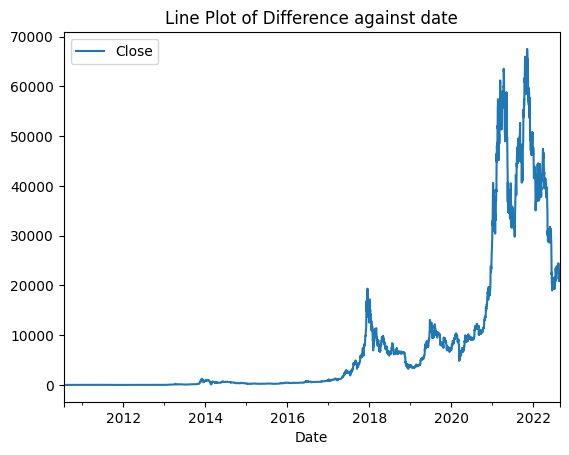

In [ ]:
df.plot.line(x="Date", y="Close", title="Line Plot of Difference against date")

plt.show()

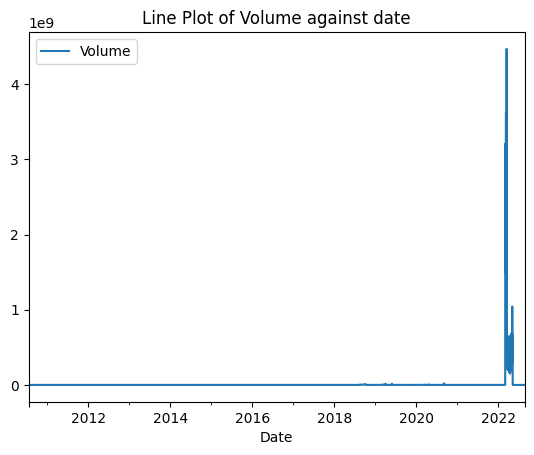

In [ ]:
df.plot.line(x="Date", y="Volume", title="Line Plot of Volume against date")

plt.show()

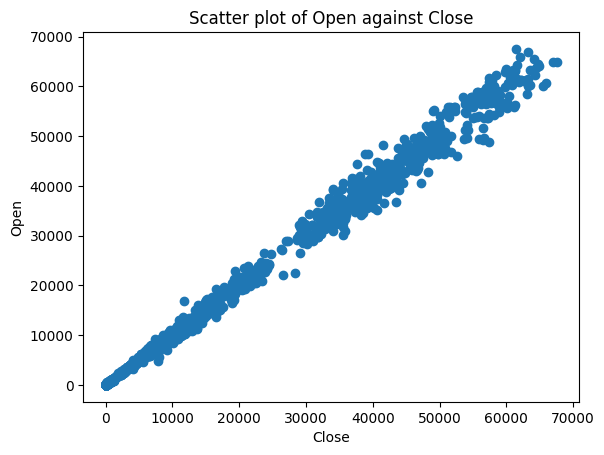

In [ ]:
plt.scatter(df['Open'], df['Close'])
plt.ylabel("Open")
plt.xlabel("Close")
plt.title('Scatter plot of Open against Close')
plt.show()

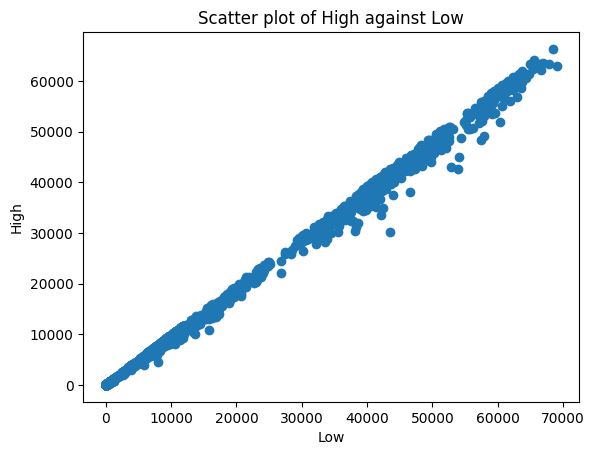

In [ ]:
plt.scatter(df['High'], df['Low'])
plt.ylabel("High")
plt.xlabel("Low")
plt.title('Scatter plot of High against Low')
plt.show()

In [ ]:
df = df.drop('Date', axis = 1)

In [ ]:
df

,Open,High,Low,Close,Volume,Year,Month,Day
0,0.0,0.1,0.1,0.1,75,2010,7,18
1,0.1,0.1,0.1,0.1,574,2010,7,19
2,0.1,0.1,0.1,0.1,262,2010,7,20
3,0.1,0.1,0.1,0.1,575,2010,7,21
4,0.1,0.1,0.1,0.1,2160,2010,7,22
...,...,...,...,...,...,...,...,...
4414,23337.7,23578.0,23131.3,20831.3,160969,2022,8,18
4415,23201.6,23202.3,20807.8,21138.9,339472,2022,8,19
4416,20830.7,21357.4,20784.8,21517.2,206943,2022,8,20
4417,21138.9,21692.4,21077.4,21416.3,177522,2022,8,21


#### Train test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Close']
X = df.drop('Close', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X Train shape: {X_train.shape}')
print(f'X Test shape: {X_test.shape}')
print(f'y Train shape: {y_train.shape}')
print(f'y Test shape: {y_test.shape}')

X Train shape: (3535, 7)
X Test shape: (884, 7)
y Train shape: (3535,)
y Test shape: (884,)


#### Implementing Scaling



In [ ]:
from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()

# fit and transform the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a new dataframe with the scaled data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# view our scaled data
X_train.head()

,Open,High,Low,Volume,Year,Month,Day
0,-0.567300,-0.567666,-0.566885,-0.088423,-1.748697,0.456155,-0.316034
1,2.558667,2.490921,2.371038,-0.087735,1.401988,0.745550,0.933862
2,0.011154,0.000085,0.019689,-0.086213,0.829136,1.034946,-1.565930
3,-0.567237,-0.567605,-0.566820,-0.088421,-1.462271,-1.280215,0.138474
4,-0.567021,-0.567395,-0.566619,-0.088217,-1.462271,1.034946,-0.543288


### Fitting and evaluating the model

#### Random Forest

We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [ ]:
# Import the random forest module
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Declare the model object
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_rmse = round(np.sqrt(mean_squared_error(y_test,rf_pred)),3)
rf_mse = round(mean_squared_error(y_test,rf_pred),3)
rf_mae = round(mean_absolute_error(y_test,rf_pred),3)
rf_r2 = round(r2_score(y_test,rf_pred),3)

In [ ]:
print("RMSE:",rf_rmse)
print("MSE:",rf_mse)
print("MAE:",rf_mae)
print("R2 Score",rf_r2)


RMSE: 828.097
MSE: 685744.119
MAE: 363.315
R2 Score 0.997


In [ ]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test,
"predicted_prob": rf_pred} )
y_pred_rf1

,actual,predicted_prob
1042,133.5,25.825884
1272,1005.3,1085.889148
1918,263.8,303.916926
1896,232.5,303.916926
4066,51768.6,50974.283579
...,...,...
2833,8923.1,8388.539363
564,6.0,25.825884
1779,225.7,303.916926
4387,22460.4,22927.466937


Plot predicted output vs expected output.

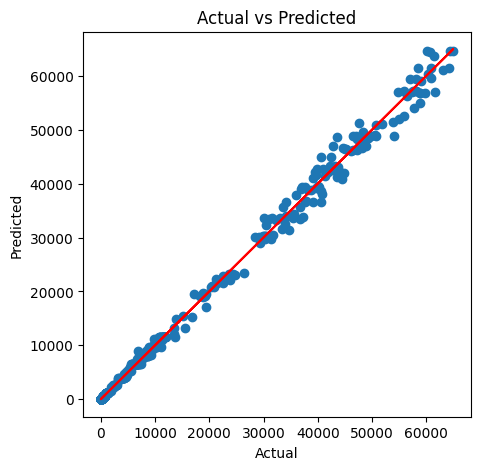

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,rf_pred)
ax.plot(y_test,y_test,'r')
plt.show()

#### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR


In [ ]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
svm_rmse = round(np.sqrt(mean_squared_error(y_test,svm_pred)),3)
svm_mse = round(mean_squared_error(y_test,svm_pred),3)
svm_mae = round(mean_absolute_error(y_test,svm_pred),3)
svm_r2 = round(r2_score(y_test,svm_pred),3)

In [ ]:
print("RMSE:",svm_rmse)
print("MSE:",svm_mse)
print("MAE:",svm_mae)
print("R2 Score",svm_r2)

RMSE: 17265.633
MSE: 298102084.305
MAE: 8443.673
R2 Score -0.241


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
# fit model and make prediction
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [ ]:
dtr_rmse = round(np.sqrt(mean_squared_error(y_test,dtr_pred)),3)
dtr_mse = round(mean_squared_error(y_test,dtr_pred),3)
dtr_mae = round(mean_absolute_error(y_test,dtr_pred),3)
dtr_r2 = round(r2_score(y_test,dtr_pred),3)

In [ ]:
print("RMSE:",dtr_rmse)
print("MSE:",dtr_mse)
print("MAE:",dtr_mae)
print("R2 Score",dtr_r2)

RMSE: 1121.678
MSE: 1258162.534
MAE: 444.705
R2 Score 0.995


#### Gradient Boost Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100)

In [ ]:
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [ ]:
gbr_rmse = round(np.sqrt(mean_squared_error(y_test,gbr_pred)),3)
gbr_mse = round(mean_squared_error(y_test,gbr_pred),3)
gbr_mae = round(mean_absolute_error(y_test,gbr_pred),3)
gbr_r2 = round(r2_score(y_test,gbr_pred),3)

In [ ]:
print("RMSE:",gbr_rmse)
print("MSE:",gbr_mse)
print("MAE:",gbr_mae)
print("R2 Score",gbr_r2)

RMSE: 845.648
MSE: 715119.705
MAE: 340.004
R2 Score 0.997


#### Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
lr_rmse = round(np.sqrt(mean_squared_error(y_test,lr_pred)),3)
lr_mse = round(mean_squared_error(y_test,lr_pred),3)
lr_mae = round(mean_absolute_error(y_test,lr_pred),3)
lr_r2 = round(r2_score(y_test,lr_pred),3)

In [ ]:
print("RMSE:",lr_rmse)
print("MSE:",lr_mse)
print("MAE:",lr_mae)
print("R2 Score",lr_r2)

RMSE: 779.504
MSE: 607625.71
MAE: 302.363
R2 Score 0.997


### Comparing the two best performing models

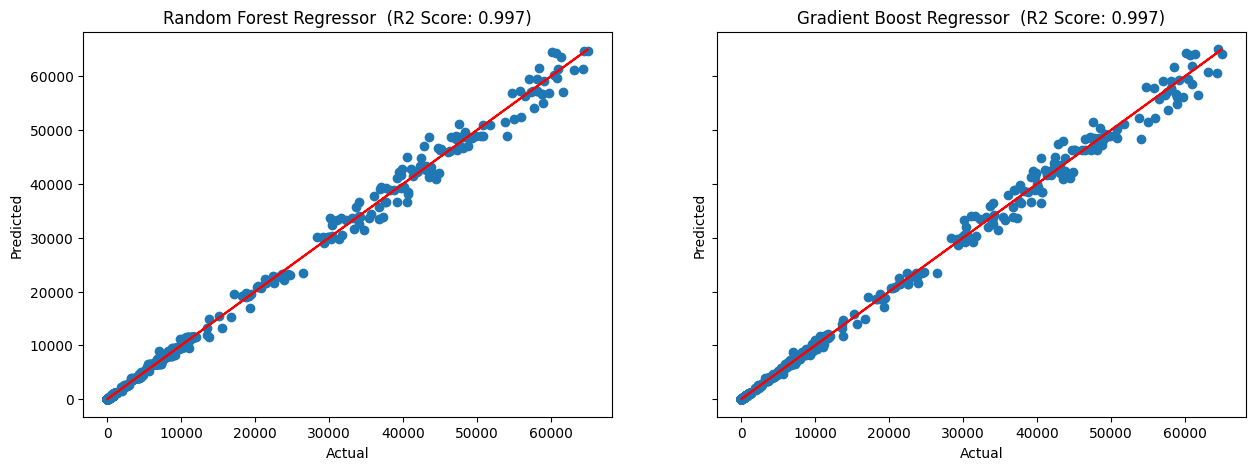

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [rf_pred, gbr_pred]
title = ['Random Forest Regressor','Gradient Boost Regressor']

# Loop through all axes to plot each model's results
for i in range(2):
    r2 = round(r2_score(pred[i],y_test),3)
    #rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (R2 Score: "+str(r2)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

### Attempting To Improve Predictions By Ensemble Methods

Ensemble methods are techniques aimed at improving model accuracy, by combining multiple models instead of using a single model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# try ensemble learning with ada boost
base_estimator = DecisionTreeRegressor()
n_estimators = 250
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, loss='exponential')

In [ ]:
# fit our model
adaboost_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), loss='exponential',
                  n_estimators=250)

In [ ]:
ada_pred = adaboost_model.predict(X_test)

In [ ]:
ada_rmse = round(np.sqrt(mean_squared_error(y_test,ada_pred)),3)
ada_mse = round(mean_squared_error(y_test,ada_pred),3)
ada_mae = round(mean_absolute_error(y_test,ada_pred),3)
ada_r2 = round(r2_score(y_test,ada_pred),3)

In [ ]:
print("RMSE:",ada_rmse)
print("MSE:",ada_mse)
print("MAE:",ada_mae)
print("R2 Score",ada_r2)

RMSE: 888.967
MSE: 790262.9
MAE: 340.381
R2 Score 0.997


### Model Performance




We will be comparing model performance based on the following metrics:
* R-squared score
* Root Mean Squared Error
* Mean Absolute Error

In [ ]:
model_performance1 = {
                    'R2 Score':
                    {
                        'Linear Regression': lr_r2,
                        'Decision Tree': dtr_r2,
                        'Support Vector': svm_r2,
                        'Random Forest': rf_r2,
                        'GradientBoostingRegressor': gbr_r2,
                        'AdaBoost': ada_r2
                    }
}
# create dataframe from dictionary
model_performance1 = pd.DataFrame(model_performance1)
model_performance1.sort_values(by='R2 Score',ascending=False)

,R2 Score
AdaBoost,0.997
GradientBoostingRegressor,0.997
Linear Regression,0.997
Random Forest,0.997
Decision Tree,0.995
Support Vector,-0.241


In [ ]:
model_performance2 = {
                    'Root Mean Squared Error':
                    {
                        'Linear Regression': lr_rmse,
                        'Decision Tree': dtr_rmse,
                        'Support Vector': svm_rmse,
                        'Random Forest': rf_rmse,
                        'GradientBoostingRegressor': gbr_rmse,
                        'AdaBoost': ada_rmse
                    }
}
# create dataframe from dictionary
model_performance2 = pd.DataFrame(model_performance2)
model_performance2.sort_values(by='Root Mean Squared Error',ascending=True)

,Root Mean Squared Error
Linear Regression,779.504
Random Forest,828.097
GradientBoostingRegressor,845.648
AdaBoost,888.967
Decision Tree,1121.678
Support Vector,17265.633


In [ ]:
model_performance3 = {
                    'Mean Absolute Error':
                    {
                        'Linear Regression': lr_mae,
                        'Decision Tree': dtr_mae,
                        'Support Vector': svm_mae,
                        'Random Forest': rf_mae,
                        'GradientBoostingRegressor': gbr_mae,
                        'AdaBoost': ada_mae
                    }
}
# create dataframe from dictionary
model_performance3 = pd.DataFrame(model_performance3)
model_performance3.sort_values(by='Mean Absolute Error',ascending=True)

,Mean Absolute Error
Linear Regression,302.363
GradientBoostingRegressor,340.004
AdaBoost,340.381
Random Forest,363.315
Decision Tree,444.705
Support Vector,8443.673


## Save Best Performing Model as a Pickle File

In [ ]:
import pickle

# store our Linear Regression model in a variable
model = adaboost_model

# Specify the file path where you want to save the model
file_path = "model.pkl"

# Save the model as a pickle file
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

## Loading the model

In [ ]:
loaded_model = pickle.load(open("model.pkl", 'rb'))


## Deploying the Model on Streamlit

In [ ]:
#!pip install streamlit

In [ ]:
import streamlit as st

In [ ]:
def Stre(input_data):
    input_data_into_numpy_array = np.asarray(input_data)

    input_data_reshaped = input_data_into_numpy_array.reshape(1,-1)

    prediction = loaded_model.predict(input_data_reshaped)

    return prediction



In [ ]:
inputD = [2,3,4,5]

In [ ]:
inputDarray = np.asarray(inputD)

In [ ]:
inputDarrayRes = inputDarray.reshape(1, -1)

In [ ]:
inputDarrayRes.shape

In [ ]:
inputDarrayRes


In [ ]:
def main():

    st.title('Bitcoin Volatility Prediction Application')


    Close = st.text_input('Closing Value of Bitcoin for the previous day')
    Year = st.text_input('Year of Prediction')
    Month = st.text_input('Month of Prediction')
    Day = st.text_input('Day of Prediction')


    # code for prediction

    Difference = ''


    # creating a button for prediction

    if st.button('Volatility Result'):
        Difference = stre([Open, High, Low, Close, Volume, Year, Month, Day])

    st.success(Difference)


In [ ]:
if __name__ == '__main__':
    main()

In [ ]:
streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py